# Predicting Car Prices
by Nicholas Archambault

The data set under consideration contains technical information on various cars, including characteristics such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

We will attempt to predict car price based on a number of these variables using the k-nearest neighbors algorithm.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Column names and their values are found below:

* `symboling`: -3, -2, -1, 0, 1, 2, 3.
* `normalized-losses`: continuous from 65 to 256.
* `make`: model type
* `fuel-type`: diesel, gas.
* `aspiration`: std, turbo.
* `num-of-doors`: four, two.
* `body-style`: hardtop, wagon, sedan, hatchback, convertible.
* `drive-wheels`: 4wd, fwd, rwd.
* `engine-location`: front, rear.
* `wheel-base`: continuous from 86.6 120.9.
* `length`: continuous from 141.1 to 208.1.
* `width`: continuous from 60.3 to 72.3.
* `height`: continuous from 47.8 to 59.8.
* `curb-weight`: continuous from 1488 to 4066.
* `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
* `num-of-cylinders`: eight, five, four, six, three, twelve, two.
* `engine-size`: continuous from 61 to 326.
* `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
* `bore`: continuous from 2.54 to 3.94.
* `stroke`: continuous from 2.07 to 4.17.
* `compression-ratio`: continuous from 7 to 23.
* `horsepower`: continuous from 48 to 288.
* `peak-rpm`: continuous from 4150 to 6600.
* `city-mpg`: continuous from 13 to 49.
* `highway-mpg`: continuous from 16 to 54.
* `price`: continuous from 5118 to 45400.

In [2]:
# Properly import data
cols = ["symboling", "normalized_losses", "make", "fuel_type", 
        "aspiration", "num_doors", "body_style", "drive_wheels", 
        "engine_location", "wheel_base", "length", "width", 
        "height", "curb_weight", "engine_type", "num_cylinders", 
        "engine_size", "fuel_system", "bore", "stroke", 
        "compression_ratio", "horsepower", "peak_rpm", 
        "city_mpg", "highway_mpg", "price"]
cars = pd.read_csv("imports-85.data", names = cols)

In [3]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


For machine learning purposes, we must consider only columns that are continuous variables. We can eliminate all non-continuous variables.

In [4]:
# Exclude non-continous variables
continuous_values_cols = ['normalized_losses', 'wheel_base', 
                          'length', 'width', 'height', 
                          'curb_weight', 'engine_size', 'bore', 
                          'stroke', 'compression_ratio', 'horsepower', 
                          'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

## Data Cleaning

Preparing this dataset for machine learning analysis will require us to clean all numeric columns and convert them to numeric type, and to fill or eliminate all missing values.

In [5]:
# Replace unknown values with NaN
numeric_cars = numeric_cars.replace("?", np.nan)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
numeric_cars = numeric_cars.replace("?", np.nan)

In [7]:
# Convert data to float type
numeric_cars = numeric_cars.astype(float)
numeric_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [8]:
# Examine the column with the most null values
numeric_cars[numeric_cars["normalized_losses"].isnull()]

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


In [9]:
# Because we want to predict the `price` column, we should drop any rows with missing price values.
numeric_cars = numeric_cars.dropna(subset = ["price"])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [10]:
# Replace missing values with means of their columns
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [11]:
# Check to confirm that no missing values are left
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [12]:
# Normalize all values to between 0 and 1 (besides the `price` column)
price = numeric_cars["price"]
numeric_cars = numeric_cars.apply(lambda x: (x - min(x))/(max(x) - min(x)))
numeric_cars["price"] = price

In [13]:
numeric_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

We can start with a simpler model before moving on to more complex and accurate versions. To execute k-nearest neighbors, we'll instantiate a K-Neighbors Regressor object, shuffle the data, divide it into training and testing sets, and use root mean squared error (RMSE) to evaluate the accuracy of our model.

We'll examine the predictive performance of each individual column in the dataset. Half the data will be used to train the model, which will be tested on the other half.

In [14]:
# Import packages
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(column, target, df):
    
    # Instantiate object
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize data order
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Calculate midpoint index; divide data into train and test sets
    midpoint = int(len(rand_df)/2)
    train = rand_df.iloc[0:midpoint]
    test = rand_df.iloc[midpoint:]
    
    # Make predictions
    knn.fit(train[[column]], train[target])
    predictions = knn.predict(test[[column]])
    
    # Evaluate RMSE and accuracy
    rmse = np.sqrt(mean_squared_error(test[target], predictions))
    
    return rmse

## For each column besides `price`, train a KNN model with default k = 5, 
    # return the RMSE, and add it to a dictionary where keys are column names
cols = numeric_cars.columns.drop("price")

rmse_results = {}
for i in cols:
    rmse_results[i] = knn_train_test(i, "price", numeric_cars)

# Show results for each column as the univariate predictor
rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Using the default k value of 5, we find that `engine_size` performed the best of all individual columns.

### Modify Parameters

We can adjust our model to accept varying values of k, from 1 to 7. Each column will be trained with each k-value, providing us deeper insight into the best univariate model.

In [15]:
def knn_train_test(column, target, df):
    np.random.seed(1)
    
    # Randomize data
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Calculate midpoint; split data into train and test sets
    midpoint = int(len(rand_df)/2)
    train = rand_df.iloc[0:midpoint]
    test = rand_df.iloc[midpoint:]
    
    # Specify list of k values
    k_values = [1,3,5,7]
    k_rmses = {}
    
    # Iterate over each k-value option; instantiate, train, and measure accuracy of object with each k
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        
        knn.fit(train[[column]], train[target])
        predictions = knn.predict(test[[column]])
    
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        
        k_rmses[i] = rmse
    
    return k_rmses

# Store results for varying k's in dictionary
k_results = {}
cols = numeric_cars.columns.drop("price")
for i in cols:
    k_results[i] = knn_train_test(i, "price", numeric_cars)
    
k_results

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006.529544647101,
  7: 7803.937796804327},
 'compression

Plotting our results shows that there is not a consensus trend regarding how columns are affected by varying k-values: some become more accurate with a higher k, others become less accurate. One thing that is consistent, however, is that the red line representing `engine_size` is consistently the most accurate predictor out of all the columns, no matter the k-value.

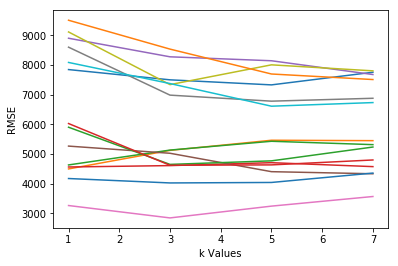

In [16]:
# Plot results
for k,v in k_results.items():
    x = list(v.keys())
    y = list(v.values())

    plt.plot(x, y)
    plt.xlabel("k Values")
    plt.ylabel("RMSE")

## Multivariate Model

We will advance to a more complex model that incorporates different numbers of predicting columns simultaneously.

In [17]:
# Compute average RMSE values across different k-values for each feature.
feature_avg_rmse = {}

for k,v in k_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = list(sorted_series_avg_rmse.index)
print(sorted_features)

engine_size          3225.149629
horsepower           4145.438421
width                4610.409657
curb_weight          4754.583650
highway_mpg          5017.247056
length               5124.730001
wheel_base           5130.889156
city_mpg             5136.708881
compression_ratio    7201.470617
bore                 7311.388431
normalized_losses    7608.484914
stroke               8066.411992
height               8251.423817
peak_rpm             8314.196206
dtype: float64
['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg', 'length', 'wheel_base', 'city_mpg', 'compression_ratio', 'bore', 'normalized_losses', 'stroke', 'height', 'peak_rpm']


The previous model can be updated so that it performs k-nearest neighbors analysis and determines the most accurate models that incorporate the 2, 3, 4, 5, and 6 best features. 

In [18]:
def knn_train_test(columns, target, df):
    np.random.seed(1)
    
    # Randomize data
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Calculate midpoint; split data into train and test sets
    midpoint = int(len(rand_df)/2)
    train = rand_df.iloc[0:midpoint]
    test = rand_df.iloc[midpoint:]
    
    # Single k-value
    k_values = [5]
    k_rmses = {}
    
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        
        knn.fit(train[columns], train[target])
        predictions = knn.predict(test[columns])
    
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        
        k_rmses[i] = rmse
    
    return k_rmses

k_results = {}

# Train model with varying number of features. Return the best model at each level of feature numbers
for number in range(2,7):
    k_results["{} best features:".format(number)] = knn_train_test(
        sorted_features[:number], 
        "price", 
        numeric_cars
    )
    
k_results

{'2 best features:': {5: 2949.8817277180374},
 '3 best features:': {5: 3580.7376651928435},
 '4 best features:': {5: 3487.340917327035},
 '5 best features:': {5: 3410.2170133901805},
 '6 best features:': {5: 3478.510890118539}}

These results that with a default k-value of 5, the simplest model performs the best: the two-feature model is the only one with an RMSE under 3000. 

This is somewhat surprising; we would expect that enfolding more features into the predictive process would lead to a more accurate model. This doesn't bear out, possibly we have constrained the k-value. 

## Hyperparameter Testing

We will attempt to boost the accuracy of our multivariate model by examining the results for a wide range of k-values, from 1 to 25. Based on the previous unexpected results, we hypothesize that at some critical k-value, we will observe models with greater numbers of features become more accurate than those with fewer features.

In [19]:
def hyperparam_test(columns, target, df):
    np.random.seed(1)
    
    # Randomize data
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Calculate midpoint; split data into train and test sets
    midpoint = int(len(rand_df)/2)
    train = rand_df.iloc[0:midpoint]
    test = rand_df.iloc[midpoint:]
    
    # Create wider range of k-values
    k_rmses = {}
    k_values = [i for i in range(1,25)]
    
    # Instantiate, train, and evaluate accuracy of model with differing k-values
    for i in k_values:
        knn = KNeighborsRegressor(n_neighbors = i)
        
        knn.fit(train[columns], train[target])
        predictions = knn.predict(test[columns])
    
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        
        k_rmses[i] = rmse
    
    return k_rmses

k_results = {}

# Train model with varying number of features. Return the best model at each level of feature numbers
for number in range(2,6):
    k_results["{} best features:".format(number)] = hyperparam_test(
        sorted_features[:number], 
        "price", 
        numeric_cars
    )
    
k_results

{'2 best features:': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features:': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.225

The above results show k-nearest neighbors model accuracy for between 2 and 7 best features, at k-values ranging from 1 to 25. These results can be better understood visually.

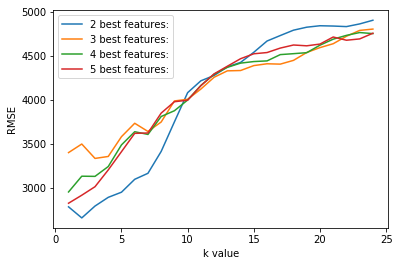

In [20]:
# Plot data
for k,v in k_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc = "upper left")

A plot of the results shows that our hypothesis has been borne out to a certain degree. Upon visual inspection, it seems like fewer-feature models are more accurate predictors -- or, at least, that the two-feature model with the fewest number of features is clearly the most effective. This trend holds until the critical value of ~9, where the results seem to flip and render something closer to what we expect: models with greater numbers of features serving as more accurate predictors. 

It's worth noting that while we eventually observe greater-feature models outperforming fewer-feature models in the relative sense, the overall trajectory of the results is that error increases -- for models of all numbers of features -- with higher k-values. The most accurate models all seem to have lower k-values. 

## Conclusion

In this project, we predicted car prices based on a number of technical characteristics and using simple, multivariate and hyperparameter-optimized k-nearest neighbors models. We ultimately find that error tends to increase with higher k-values, and that models incorporating more features do not necessarily perform markedly better than those with fewer features.